<a href="https://colab.research.google.com/github/chaubeyarvind/DataAnalytics-NumPY/blob/main/Logistic_Regression_Sep29_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
train = pd.read_csv('/content/sample_data/titanic_train.csv')

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [9]:
train.shape

(891, 12)

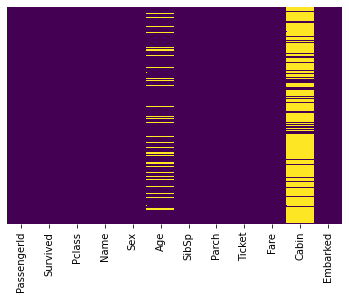

In [10]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

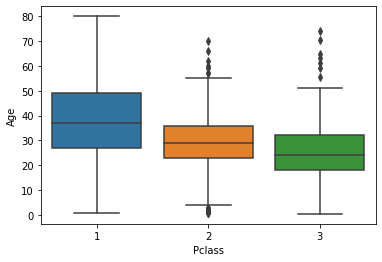

In [11]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [24]:
def simulate_age(cols):
        Age = cols[0]
        Pclass = cols[1]
        if pd.isnull(Age):
          if Pclass == 1:
             return 38
          elif Pclass == 2:
             return 30
          else: 
            return 23
        else:
          return Age

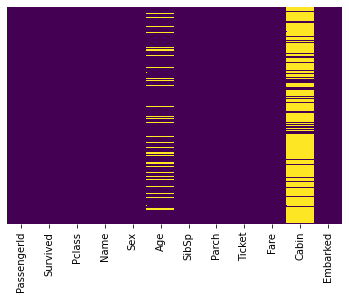

In [25]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [26]:
train.drop('Cabin', axis = 1, inplace=True)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [28]:
gender = pd.get_dummies(train['Sex'])

In [29]:
train.drop(['Sex', 'Name', 'Ticket', 'Embarked'], axis = 1, inplace=True)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [32]:
train = pd.concat([train, gender], axis = 1)